In [1]:
%matplotlib notebook

from gamesopt.train import train, TrainConfig
from gamesopt.games import load_game, GameOptions, GameType
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


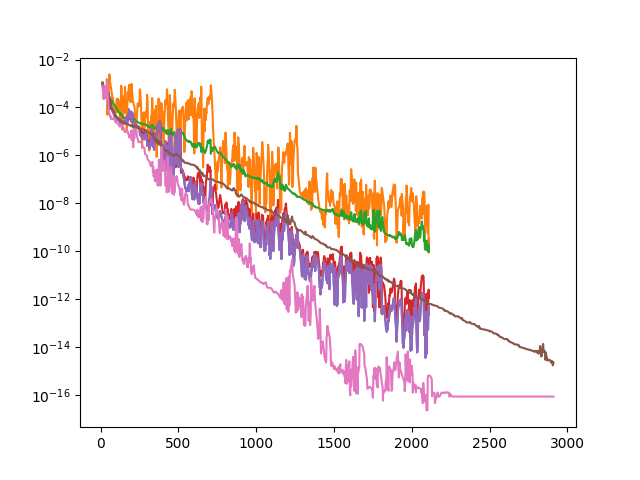

In [2]:
config = TrainConfig()
config.game.game_type = GameType.ROBUST_LINEAR_REG
config.game.quadratic_options.num_samples = 100
config.game.quadratic_options.dim = 10
config.num_iter = 1000
config.game.quadratic_options.bias = True

plt.figure()
plt.yscale('log')

In [8]:
config.optimizer.lr = 1e-1
config.optimizer.optimizer_type = OptimizerType.PROX_SGDA
metrics = train(config)
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

In [9]:
config.optimizer.lr = 2e-1
config.optimizer.optimizer_type = OptimizerType.PROX_LSVRGDA
config.optimizer.p = 0.1
metrics = train(config)
plt.plot(metrics.num_grad, metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))

In [13]:
plt.legend()